In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [5]:
zoo=pd.read_csv('Zoo.csv',index_col='animal name')

In [6]:
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
animal name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### EDA

In [7]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 14.2+ KB


In [8]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [10]:
zoo.duplicated().sum()

42

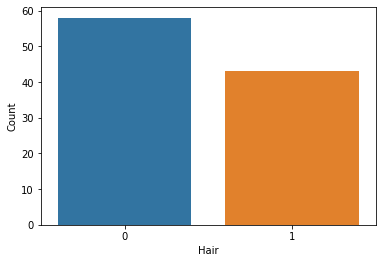

0    58
1    43
Name: hair, dtype: int64

In [11]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

[]

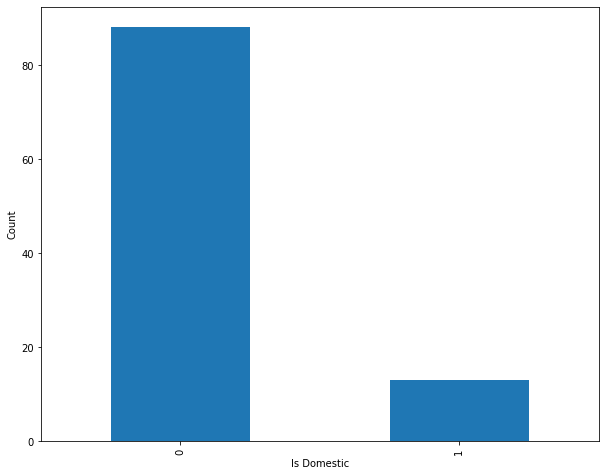

In [12]:
# Lets plot how many animals are domestic or not

plt.figure(figsize=(10,8))
zoo['domestic'].value_counts().plot(kind="bar")
plt.xlabel('Is Domestic')
plt.ylabel("Count")
plt.plot()

### split data into train and test

In [13]:
from sklearn.model_selection import train_test_split
X=zoo.iloc[:,0:15]
y=zoo.iloc[:,15]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
Xtrain

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
animal name,,,,,,,,,,,,,,,
toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0
frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0
ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0
reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
rhea,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0


In [15]:
ytrain

animal name
toad        0
frog        0
ladybird    0
reindeer    1
crayfish    0
           ..
pike        1
rhea        1
crab        0
tuna        1
moth        0
Name: catsize, Length: 80, dtype: int64

In [16]:
Xtest

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
animal name,,,,,,,,,,,,,,,
squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
oryx,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0
puma,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [17]:
ytest

animal name
squirrel    0
oryx        1
porpoise    1
puma        1
lion        1
honeybee    0
elephant    1
leopard     1
cheetah     1
aardvark    1
dogfish     1
gnat        0
wasp        0
gull        0
seawasp     0
boar        1
vampire     0
skimmer     0
chub        0
goat        1
seasnake    0
Name: catsize, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
kmodel=KNeighborsClassifier(n_neighbors=3)
kmodel.fit(Xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [20]:
## pridect the model

pred=kmodel.predict(Xtest)
pd.Series(pred).value_counts()

1    15
0     6
dtype: int64

In [21]:
pd.crosstab(ytest,pred)

col_0,0,1
catsize,,
0,6,4
1,0,11


In [22]:
## Accuracy

np.mean(pred==ytest)

0.8095238095238095

In [23]:
kmodel.score(Xtrain,ytrain)

0.775

In [24]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy", accuracy_score(ytest,pred))

Accuracy 0.8095238095238095


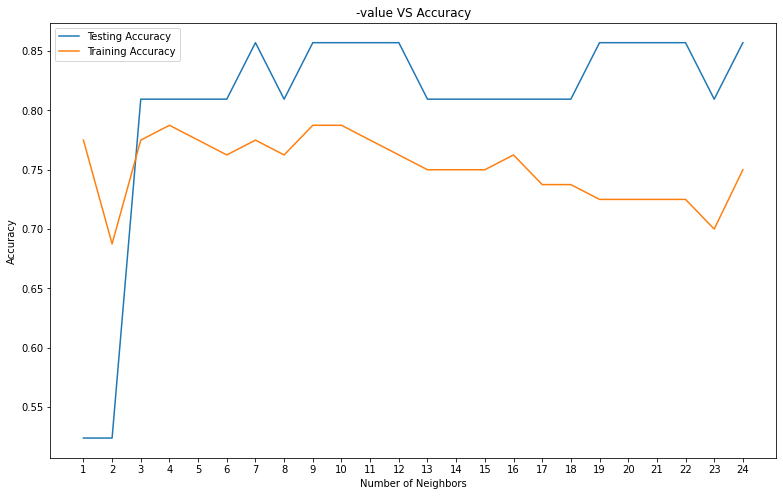

Best accuracy is 0.8571428571428571 with K = 7


In [25]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(Xtrain,ytrain)
    #train accuracy
    train_accuracy.append(knn.score(Xtrain,ytrain))
    # test accuracy
    test_accuracy.append(knn.score(Xtest,ytest))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))